## Model discrimination via genetic algorithm

Generating training data...
Generating test data...
Running genetic algorithm optimization...

Generation 0
New best fitness: -2.1912548715738613
Parameters: [0.4955146910291036, 0.8566117676466931, 3.2800405878083922, 0.3100592602219974, 4.882575516868356]
Active terms: ['Monod Growth', 'Hill Kinetics Growth', 'Product Inhibition Factor (Competitive)']
Errors by experiment: [0.7556675843856174, 0.48053195395651416, 0.24044261471311934, 0.5646127185186103]

Generation 0 summary:
Best fitness: -2.1912548715738613
Current best parameters: [0.4955146910291036, 0.8566117676466931, 3.2800405878083922, 0.3100592602219974, 4.882575516868356]
Current errors by experiment: [0.7556675843856174, 0.48053195395651416, 0.24044261471311934, 0.5646127185186103]

Generation 2
New best fitness: -1.1972807915200037
Parameters: [0.7273780717781527, 2.4430947631823496, 3.539593383663082, 0.3192913425958749, 4.880641745419028]
Active terms: ['Hill Kinetics Growth', 'Product Inhibition Factor (Competitive)',

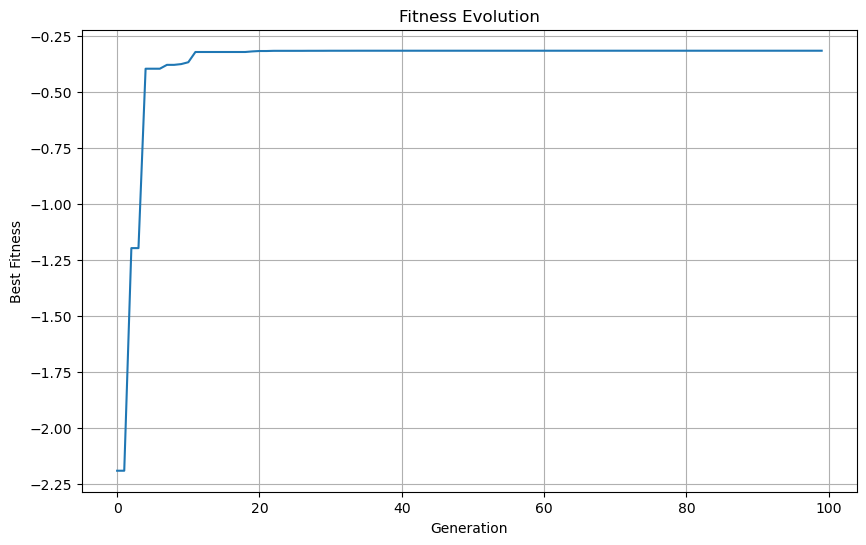

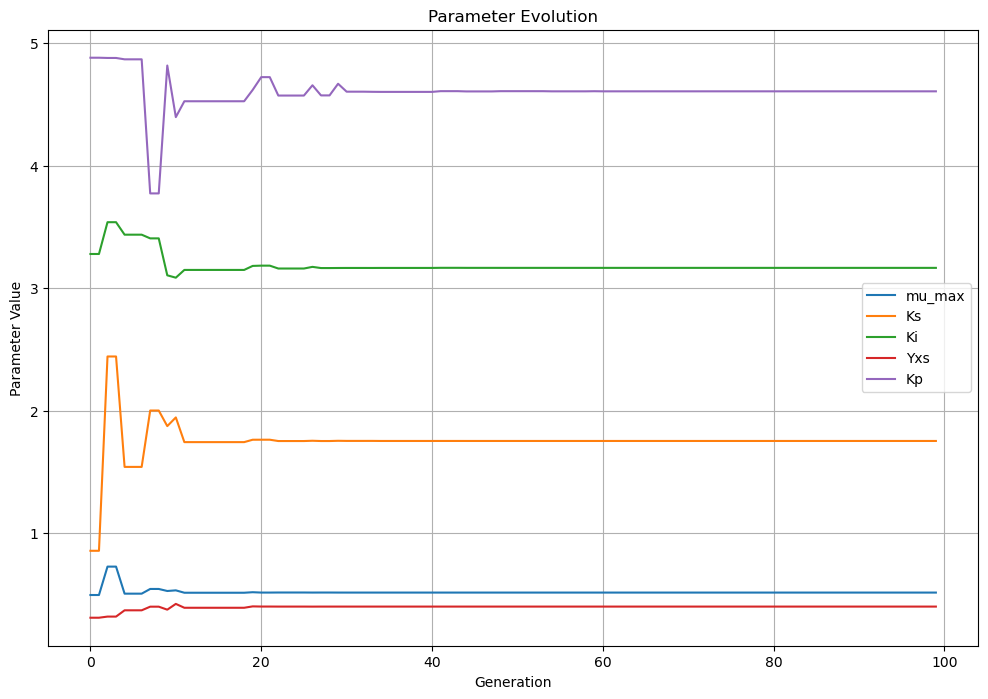


Evaluating solution...

Chosen Terms:
- Hill Kinetics Growth
- Substrate Threshold Activation

Best Parameters:
mu_max=0.5153705168951895, true value:0.5
Ks=1.7533263388333784, true value:2.0
Kp=3.166664556664708, true value:1.0
Yxs=0.40099417250288544, true value:0.4
Ki=4.608202843620193, true value:nan

Test Data Performance:
Overall RMSE: 0.4318

RMSE by variable:
biomass: 0.3197
substrate: 0.7961
product: 0.0959
inhibitor: 0.0000


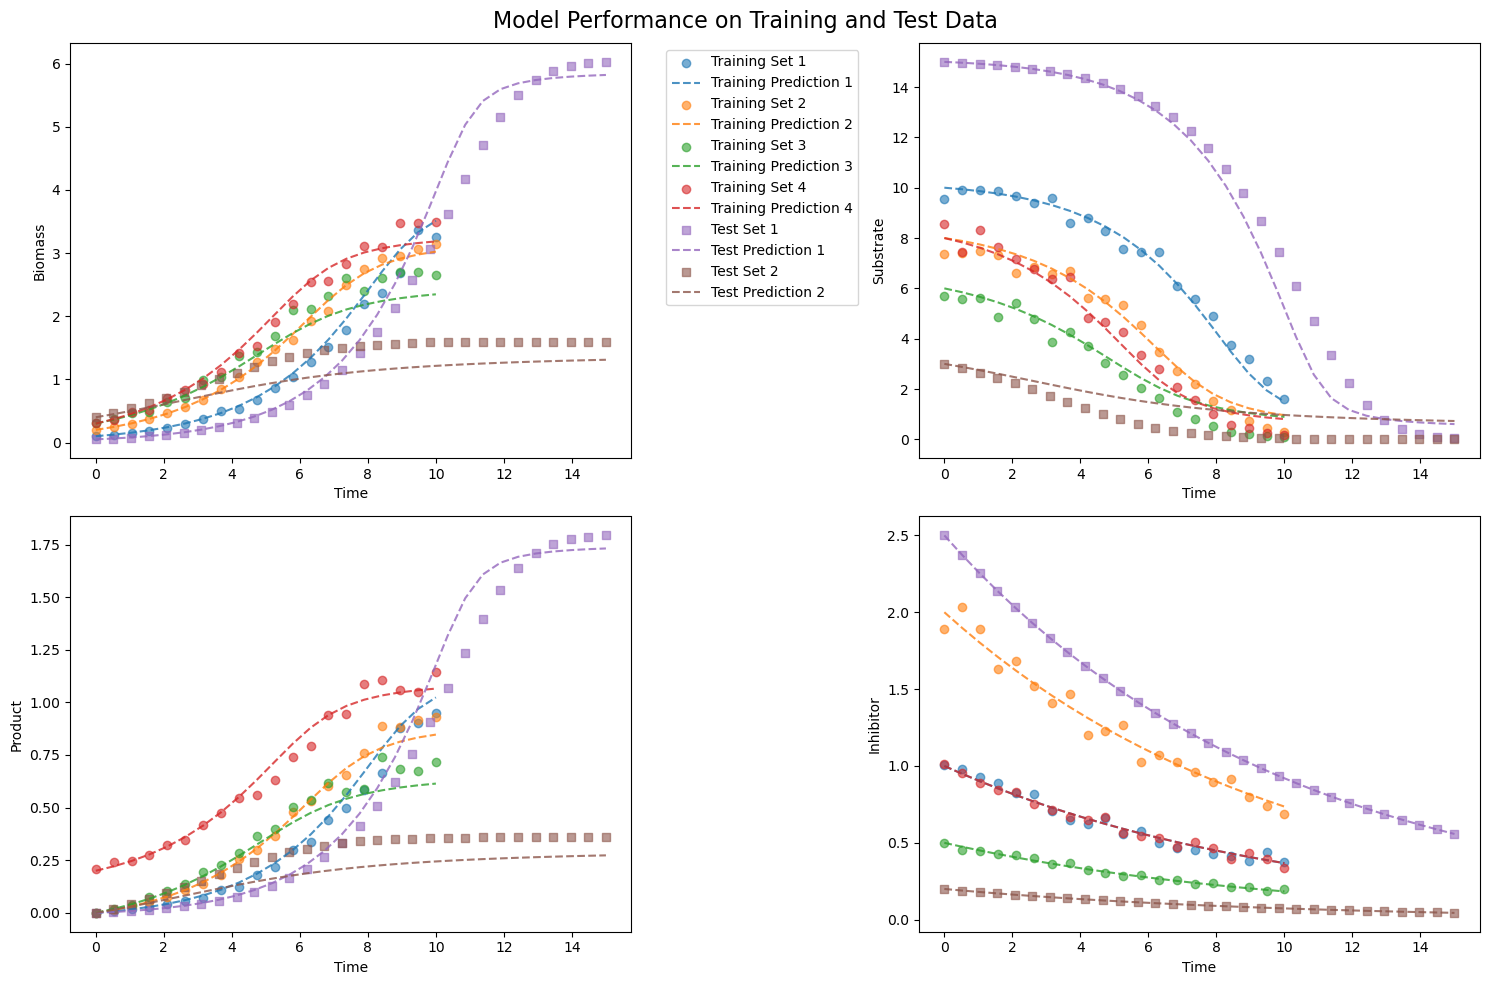

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

from bio_model import (
    evaluate_student_solution,
    genetic_algorithm,
    generate_training_data,
    generate_test_data,
    true_model_day2,
    true_model_day3,
    plot_results,
    DEFAULT_PARAMS,
    DAY3_PARAMS,
    TERM_NAMES,
)

# Define initial conditions
initial_conditions = [
    [0.1, 10.0, 0.0, 1.0],  # Low X, high S, medium I
    [0.2, 8.0, 0.0, 2.0],   # Medium X, medium S, high I
    [0.3, 6.0, 0.0, 0.5],   # High X, low S, medium I
    [0.3, 8.0, 0.2, 1.0],   # High X, medium S, high I
]

# Generate and save training data
print("Generating training data...")
training_data, training_df = generate_training_data(
    initial_conditions=initial_conditions,
    true_model=true_model_day2,
)
training_df.to_csv("training_data_day2.csv", index=False)

# Generate test data
print("Generating test data...")
test_conditions = [
    [0.05, 15.0, 0.0, 2.5],  # Very low X, very high S
    [0.4, 3.0, 0.0, 0.2],  # Very high X, very low S
]
test_data = generate_test_data(test_conditions=test_conditions, true_model=true_model_day2)

# Run genetic algorithm optimization
print("Running genetic algorithm optimization...")
best_individual = genetic_algorithm(
    training_data,
    population_size=30,
    generations=100
)

# Evaluate solution
print("\nEvaluating solution...")
rmse, variable_rmse, test_predictions = evaluate_student_solution(
    best_individual["mask"],
    best_individual["params"],
    test_data
)

# Print results
print("\nChosen Terms:")
for i, (term, active) in enumerate(zip(TERM_NAMES, best_individual["mask"])):
    if active:
        print(f"- {term}")

print("\nBest Parameters:")
true_values = [0.5, 2.0, 1.0, 0.4, "NaN"]
for (param, true_value), value in zip(
    DEFAULT_PARAMS.items(),
    best_individual["params"],
):
    print(f"{param}={value}, true value:{true_value}")

print("\nTest Data Performance:")
print(f"Overall RMSE: {rmse:.4f}")
print("\nRMSE by variable:")
for var, error in variable_rmse.items():
    print(f"{var}: {error:.4f}")

# Plot results with enhanced visualization
plot_results(training_data, test_data, best_individual, test_predictions)

Generating training data...
Generating test data...
Running genetic algorithm optimization...

Generation 0
New best fitness: -0.23092912642254926
Parameters: [0.9085660862099869, 2.1511625965909107, 4.485218724491052, 0.7429735103812488, 4.510356061141851]
Active terms: ['Double Substrate Limited Factor']
Errors by experiment: [0.08461662199848342, 0.0748285717578023, 0.021483932666263524]

Generation 0 summary:
Best fitness: -0.23092912642254926
Current best parameters: [0.9085660862099869, 2.1511625965909107, 4.485218724491052, 0.7429735103812488, 4.510356061141851]
Current errors by experiment: [0.08461662199848342, 0.0748285717578023, 0.021483932666263524]
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8295932626043D+01   r2 =  0.5580379369692D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t 

/Users/Laura/repo/rEaCt-Retreat-2025/bio_model.py:309: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y_pred = odeint(


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9281960736981D+01   r2 =  0.6308668750430D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9281960736981D+01   r2 =  0.6308668750430D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9281960736981D+01   r2 =  0.1104141230390D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9281960736981D+01   r2 =  0.1104141230390D-15
 lsoda--  warning..internal t (=r1) 

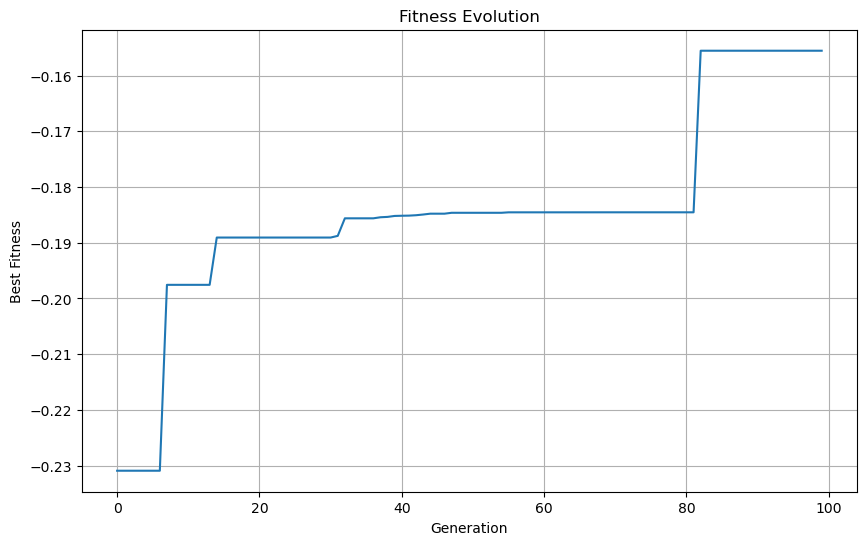

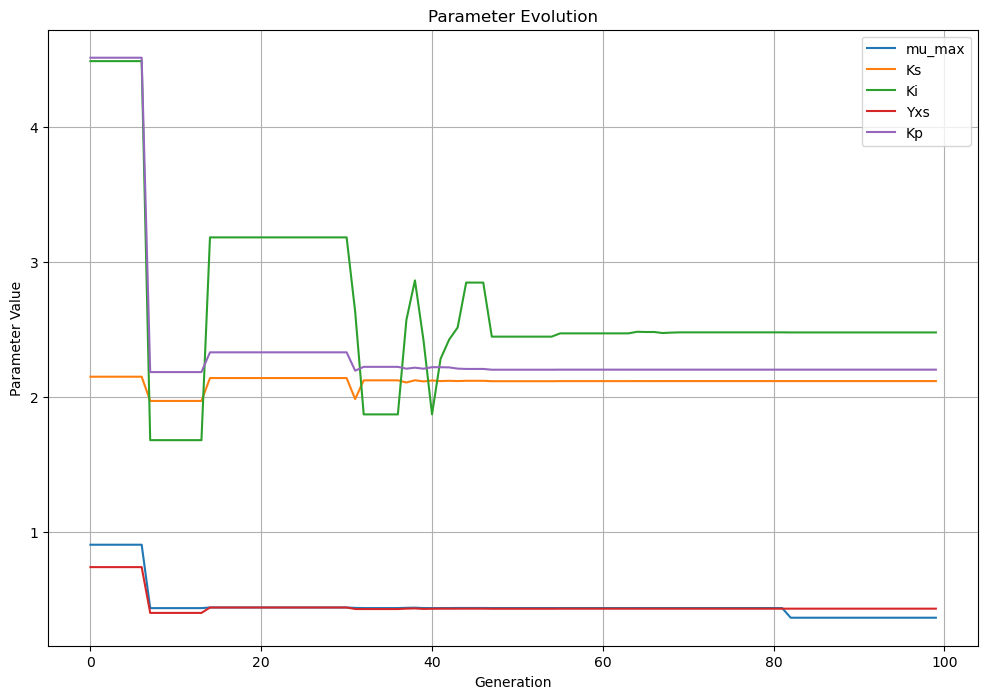


Evaluating solution...
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6970631957696D+01   r2 =  0.2415008618300D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6970631957696D+01   r2 =  0.2415008618300D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6970631957696D+01   r2 =  0.3084966854804D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6970631957696D+01   r2 =  0.3084966854804D-15
 lsoda--  wa

/Users/Laura/repo/rEaCt-Retreat-2025/bio_model.py:646: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y_pred = odeint(


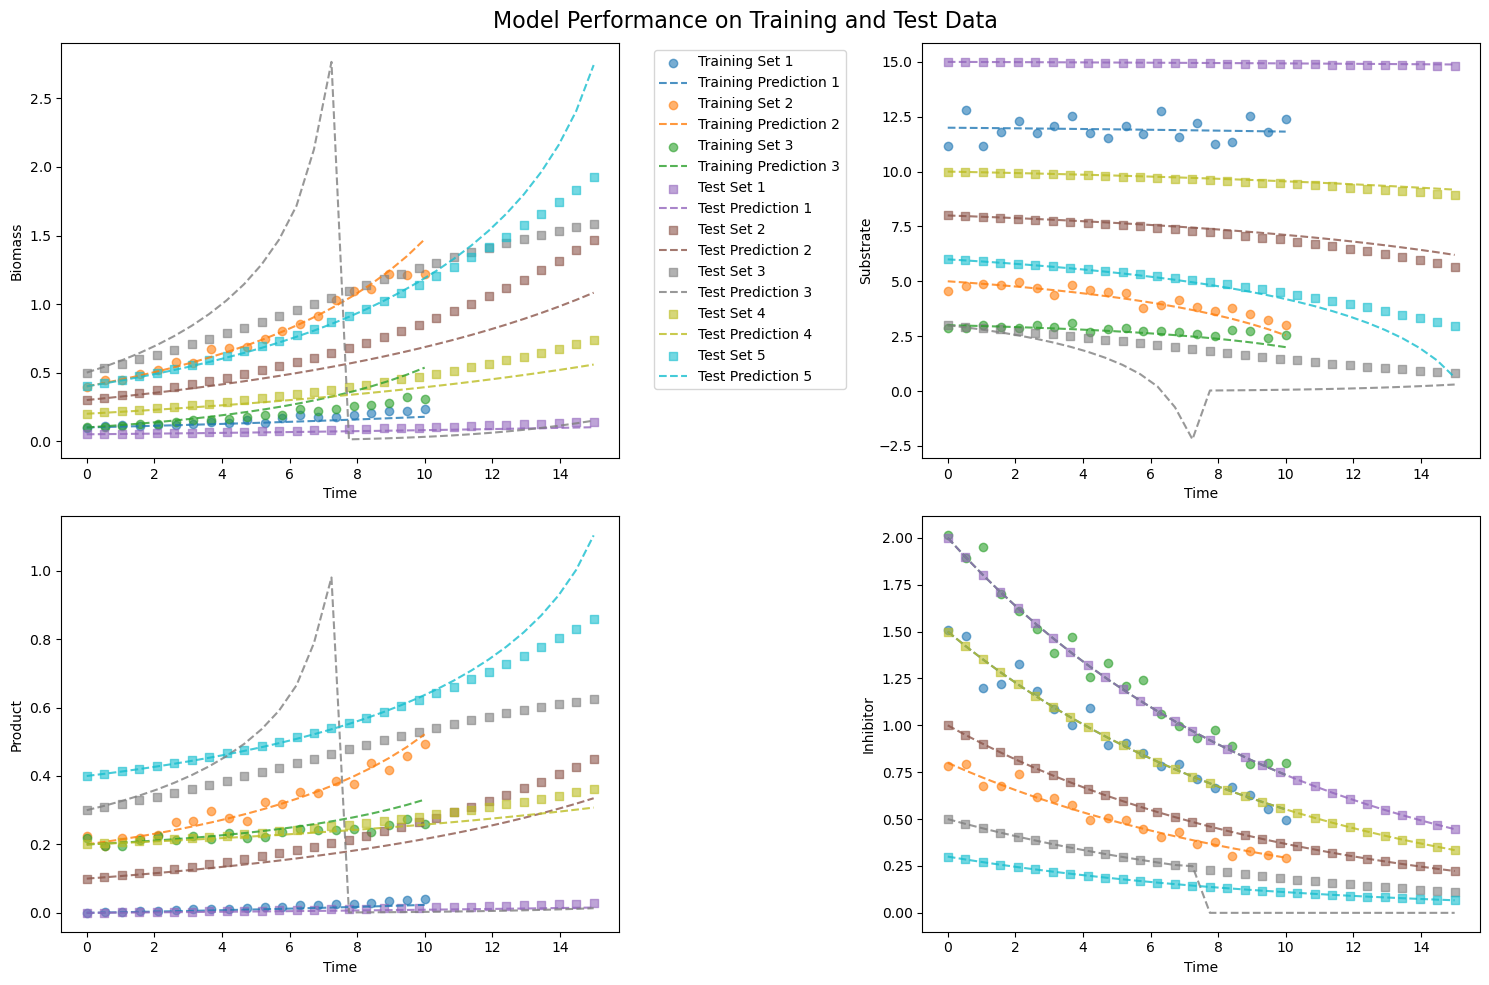

In [2]:
# Generate two training datasets
initial_conditions = [
    [0.1, 12.0, 0.0, 1.5],  # Low X, very high S, medium I
    [0.4, 5.0, 0.2, 0.8],   # High X, medium S, low I
    [0.1, 3.0, 0.2, 2.0],   # Low X, low S, high I
]
    
print("Generating training data...")
training_data, training_df = generate_training_data(
    initial_conditions=initial_conditions,
    true_model=true_model_day3,
    )
training_df.to_csv("training_data_day3.csv", index=False)

# Test conditions (5 different scenarios)
test_conditions = [
    [0.05, 15.0, 0.0, 2.0],  # Very low X, very high S, high I
    [0.3, 8.0, 0.1, 1.0],    # Medium X, high S, medium I
    [0.5, 3.0, 0.3, 0.5],    # High X, low S, low I
    [0.2, 10.0, 0.2, 1.5],   # Low X, high S, medium I
    [0.4, 6.0, 0.4, 0.3],    # High X, medium S, very low I
]

# Generate test data
print("Generating test data...")
test_data = generate_test_data(test_conditions=test_conditions, true_model=true_model_day3)

# Run genetic algorithm optimization
print("Running genetic algorithm optimization...")
best_individual = genetic_algorithm(
    training_data,
    population_size=30,
    generations=100
)

# Evaluate solution
print("\nEvaluating solution...")
rmse, variable_rmse, test_predictions = evaluate_student_solution(
    best_individual["mask"],
    best_individual["params"],
    test_data
)

# Print results
print("\nChosen Terms:")
for i, (term, active) in enumerate(zip(TERM_NAMES, best_individual["mask"])):
    if active:
        print(f"- {term}")

print("\nBest Parameters:")
for (param, true_value), value in zip(
    DAY3_PARAMS.items(),
    best_individual["params"],
):
    print(f"{param}={value}, true value:{true_value}")

print("\nTest Data Performance:")
print(f"Overall RMSE: {rmse:.4f}")
print("\nRMSE by variable:")
for var, error in variable_rmse.items():
    print(f"{var}: {error:.4f}")

# Plot results with enhanced visualization
plot_results(training_data, test_data, best_individual, test_predictions)